In [1]:
import pandas as pd, numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt , seaborn as sns

# <font color = blue>Analysing Application data </font>

In [2]:
df = pd.read_csv("application_data.csv")

In [152]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [7]:
df.shape #there is 122 columns including null values 

(307511, 122)

## <font color = brown> Handling null values </font>

In [8]:
100*df.isnull().mean()

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

## <font color = green>We will drop the data which has more than 40% null values.</font>

In [9]:
cols_to_drop = list(df.columns[100*df.isnull().mean()>40])
print(cols_to_drop)
print(len(cols_to_drop))

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

In [10]:
df = df.drop(cols_to_drop,axis=1)

In [11]:
df.shape

(307511, 73)

In [12]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# DAYS_BIRTH	DAYS_EMPLOYED	DAYS_REGISTRATION	DAYS_ID_PUBLISH DAYS_LAST_PHONE_CHANGE
# on the above table we can see the 5 columns i.e., given above contains some negative values

In [14]:
100*df.isnull().mean().sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

### <font color = blue> Now we are checking whether the data is numerical or categorical in nature. </font>

In [15]:
df.OCCUPATION_TYPE.head(10)             # categorical

0       Laborers
1     Core staff
2       Laborers
3       Laborers
4     Core staff
5       Laborers
6    Accountants
7       Managers
8            NaN
9       Laborers
Name: OCCUPATION_TYPE, dtype: object

In [16]:
df[["OCCUPATION_TYPE" ,               
'EXT_SOURCE_3'         ,          
'AMT_REQ_CREDIT_BUREAU_YEAR',     
'AMT_REQ_CREDIT_BUREAU_QRT'  ,    
'AMT_REQ_CREDIT_BUREAU_MON'   ,   
'AMT_REQ_CREDIT_BUREAU_WEEK'   ,  
'AMT_REQ_CREDIT_BUREAU_DAY'     , 
'AMT_REQ_CREDIT_BUREAU_HOUR'     ,
'NAME_TYPE_SUITE'                 ,
'OBS_30_CNT_SOCIAL_CIRCLE'        ,
'DEF_30_CNT_SOCIAL_CIRCLE'        ,
'OBS_60_CNT_SOCIAL_CIRCLE'        ,
'DEF_60_CNT_SOCIAL_CIRCLE'        ,
'EXT_SOURCE_2'                    ,
'AMT_GOODS_PRICE'                 ,
'AMT_ANNUITY'                     ,
'CNT_FAM_MEMBERS'                 ,
'DAYS_LAST_PHONE_CHANGE']].tail(12)

,OCCUPATION_TYPE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
307499,Medicine staff,0.206779,0.0,1.0,1.0,0.0,0.0,0.0,Unaccompanied,4.0,0.0,4.0,0.0,0.649123,225000.0,12694.5,2.0,-1511.0
307500,NaN,0.337673,5.0,0.0,1.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.789389,1138500.0,35982.0,2.0,-1459.0
307501,Low-skill Laborers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unaccompanied,2.0,1.0,2.0,1.0,0.575481,225000.0,11871.0,5.0,-448.0
307502,Laborers,0.735221,1.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.313334,225000.0,10620.0,3.0,-1516.0
307503,Core staff,0.609276,2.0,0.0,1.0,0.0,0.0,0.0,Unaccompanied,9.0,3.0,9.0,2.0,0.501221,247500.0,17770.5,1.0,-2315.0
307504,Sales staff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unaccompanied,0.0,0.0,0.0,0.0,0.530725,225000.0,16096.5,1.0,0.0
307505,NaN,0.742182,0.0,0.0,2.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.346391,225000.0,22050.0,1.0,0.0
307506,Sales staff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unaccompanied,0.0,0.0,0.0,0.0,0.681632,225000.0,27558.0,1.0,-273.0
307507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unaccompanied,0.0,0.0,0.0,0.0,0.115992,225000.0,12001.5,1.0,0.0
307508,Managers,0.218859,1.0,0.0,1.0,0.0,0.0,1.0,Unaccompanied,6.0,0.0,6.0,0.0,0.535722,585000.0,29979.0,1.0,-1909.0


In [17]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace=True)    
df.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)
df.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace=True)
df.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace=True)
df.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace=True)
df.AMT_REQ_CREDIT_BUREAU_MON.fillna(df.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)

In [18]:
df.EXT_SOURCE_3.fillna(df.EXT_SOURCE_3.median(),inplace=True)
df.EXT_SOURCE_2.fillna(df.EXT_SOURCE_2.median(),inplace=True)

In [19]:
df.NAME_TYPE_SUITE.fillna(df.NAME_TYPE_SUITE.mode()[0],inplace=True)               
df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(df.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)       
df.DEF_30_CNT_SOCIAL_CIRCLE.fillna(df.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)             
df.OBS_60_CNT_SOCIAL_CIRCLE.fillna(df.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0] , inplace=True)      
df.DEF_60_CNT_SOCIAL_CIRCLE.fillna(df.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)

In [20]:
100*df.isnull().mean().sort_values(ascending=False) 

OCCUPATION_TYPE                31.345545
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_4                 0.000000
SK_ID_CURR                      0.000000
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_2                 0.000000
DEF_60_CNT_SOCIAL_CIRCLE        0.000000
OBS_60_CNT_SOCIAL_CIRCLE        0.000000
DEF_30_CNT_SOCIAL_CIRCLE        0.000000
OBS_30_CNT_SOCIAL_CIRCLE        0.000000
EXT_SOURCE_3                    0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_11                0.000000
ORGANIZATION_TYPE               0.000000
FLAG_DOCUMENT_20                0.000000
AMT_REQ_CREDIT_BUREAU_QRT       0.000000
AMT_REQ_CREDIT_B

In [21]:
df[['AMT_GOODS_PRICE',       
'AMT_ANNUITY',              
'CNT_FAM_MEMBERS' ]].head()

,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS
0,351000.0,24700.5,1.0
1,1129500.0,35698.5,2.0
2,135000.0,6750.0,1.0
3,297000.0,29686.5,2.0
4,513000.0,21865.5,1.0


In [22]:
df['AMT_GOODS_PRICE'].fillna(df.AMT_GOODS_PRICE.median(),inplace=True)     
df['AMT_ANNUITY'].fillna(df.AMT_ANNUITY.median(),inplace=True)             
df['CNT_FAM_MEMBERS'].fillna(df.CNT_FAM_MEMBERS.mode()[0],inplace=True)

In [23]:
100*df.isnull().mean().sort_values(ascending=False) 

OCCUPATION_TYPE                31.345545
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_2                 0.000000
SK_ID_CURR                      0.000000
DEF_60_CNT_SOCIAL_CIRCLE        0.000000
OBS_60_CNT_SOCIAL_CIRCLE        0.000000
DEF_30_CNT_SOCIAL_CIRCLE        0.000000
OBS_30_CNT_SOCIAL_CIRCLE        0.000000
EXT_SOURCE_3                    0.000000
EXT_SOURCE_2                    0.000000
ORGANIZATION_TYPE               0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_10                0.000000
REG_CITY_NOT_WORK_CITY          0.000000
FLAG_DOCUMENT_11                0.000000
AMT_REQ_CREDIT_BUREAU_QRT       0.000000
AMT_REQ_CREDIT_BUREAU_MON       0.000000
AMT_REQ_CREDIT_BUREAU_WEEK      0.000000
AMT_REQ_CREDIT_B

## <font color = red>Handling negative value </font>

In [24]:
# DAYS_BIRTH	DAYS_EMPLOYED	DAYS_REGISTRATION	DAYS_ID_PUBLISH DAYS_LAST_PHONE_CHANGE
# on the above table we can see the 5 columns i.e., given above contains some negative values

In [25]:
df.DAYS_LAST_PHONE_CHANGE.describe() # first we have to covert these negative columns into positive one to get positive median

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [26]:
negative_to_positive = ['DAYS_BIRTH' , 'DAYS_EMPLOYED' , 'DAYS_REGISTRATION' , 'DAYS_ID_PUBLISH' , 'DAYS_LAST_PHONE_CHANGE']
for cols in negative_to_positive:
    df[cols] = abs(df[cols]) #abs function will convert -ve int into +ve one

In [27]:
# now we will check median again
df.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [28]:
df.DAYS_LAST_PHONE_CHANGE.fillna(df.DAYS_LAST_PHONE_CHANGE.median(),inplace=True)

In [29]:
df.OCCUPATION_TYPE.fillna('Unknown' ,inplace=True)
#occupation type column has almost 31% missing values and imputing them with mode will not make any sense 

In [30]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# <font color = cyan> Now check data types </font>

In [32]:
df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [33]:
df.DAYS_BIRTH = df.DAYS_BIRTH.apply(lambda x : x/365)
df.DAYS_EMPLOYED = df.DAYS_EMPLOYED.apply(lambda x : x/365)

In [34]:
df.CNT_FAM_MEMBERS = df.CNT_FAM_MEMBERS.astype('int') #family members can never be a float

# Replacing invalid values

In [35]:
df.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [36]:
df.CODE_GENDER.replace('XNA', 'F',inplace = True)

In [37]:
df.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [38]:
df.NAME_HOUSING_TYPE.value_counts()

NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

In [39]:
df.FLAG_MOBIL.value_counts()

FLAG_MOBIL
1    307510
0         1
Name: count, dtype: int64

In [40]:
df.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [41]:
df.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [42]:
df.ORGANIZATION_TYPE.replace('XNA' , 'Unknown' , inplace=True)

## <font color = dark> Checking Outliers </font>

In [43]:
df.head(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,3648.0,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,4260.0,2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,9833.0,2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,4311.0,3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,46.413699,4.350685,4970.0,477,1,1,1,1,1,0,Laborers,2,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,37.747945,8.575342,1213.0,619,1,1,0,1,1,0,Accountants,3,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Marri

In [44]:
df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05
mean,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05
std,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06


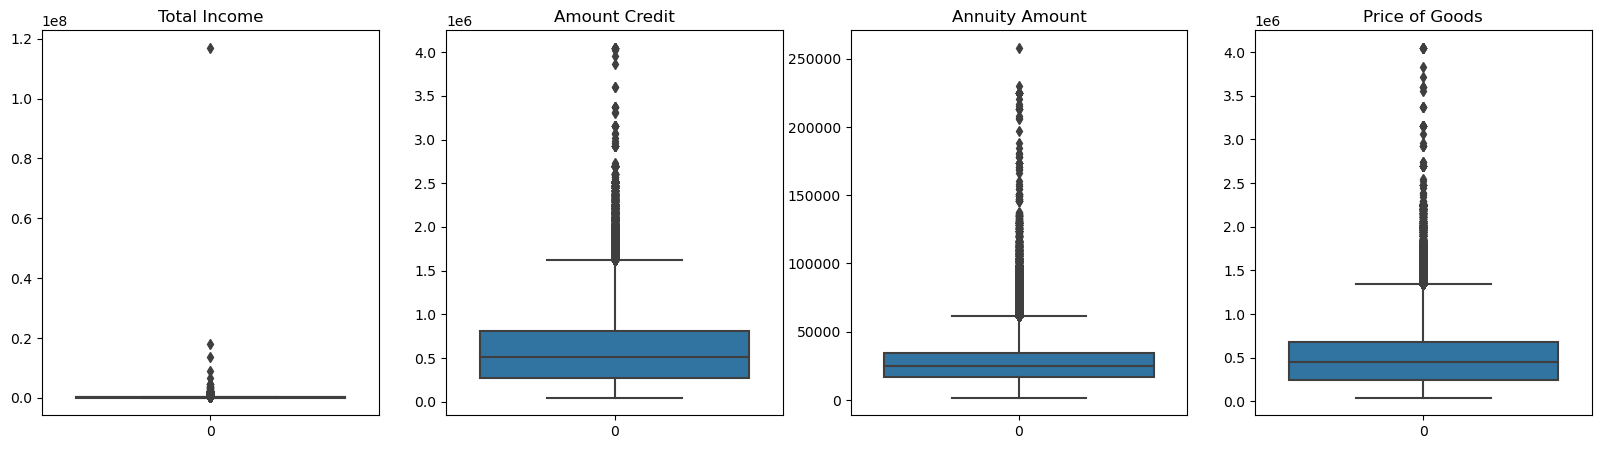

In [45]:
plt.figure(figsize=(20,5))


plt.subplot(1,4,1)
plt.title('Total Income')
sns.boxplot(df.AMT_INCOME_TOTAL)

plt.subplot(1,4,2)
plt.title('Amount Credit')
sns.boxplot(df.AMT_CREDIT)

plt.subplot(1,4,3)
plt.title('Annuity Amount')
sns.boxplot(df.AMT_ANNUITY)

plt.subplot(1,4,4)
plt.title('Price of Goods')
sns.boxplot(df.AMT_GOODS_PRICE
)

plt.show()

### Treating the outliers 

In [46]:
Q3 = df.AMT_GOODS_PRICE.quantile(0.75)
Q1 = df.AMT_GOODS_PRICE.quantile(0.25)
IQR = Q3-Q1

upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR
print(IQR, upper_bound, lower_bound)

441000.0 1341000.0 -423000.0


In [47]:
df.AMT_GOODS_PRICE = np.where(df.AMT_GOODS_PRICE> upper_bound, upper_bound, df.AMT_GOODS_PRICE)

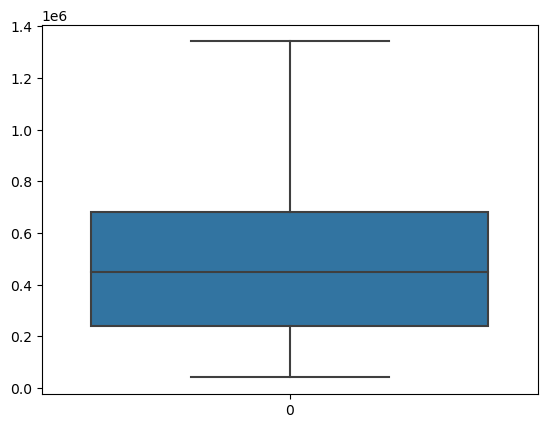

In [48]:
sns.boxplot(df.AMT_GOODS_PRICE)
plt.show()

In [49]:
#Now AMT_ANNUITY column
Q3 = df.AMT_ANNUITY.quantile(0.75)
Q1 = df.AMT_ANNUITY.quantile(0.25)
IQR = Q3-Q1

upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR
print(IQR, upper_bound, lower_bound)

18072.0 61704.0 -10584.0


In [50]:
df.AMT_ANNUITY = np.where(df.AMT_ANNUITY> upper_bound, upper_bound, df.AMT_ANNUITY)

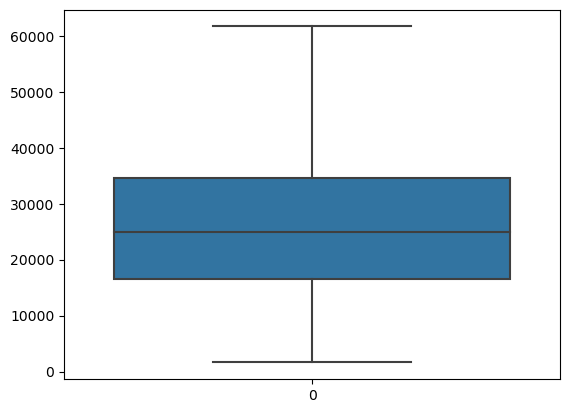

In [51]:
sns.boxplot(df.AMT_ANNUITY)
plt.show()

In [52]:
Q3 = df.AMT_CREDIT.quantile(0.75)
Q1 = df.AMT_CREDIT.quantile(0.25)
IQR = Q3-Q1

upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR
print(IQR, upper_bound, lower_bound)

538650.0 1616625.0 -537975.0


In [53]:
df.AMT_CREDIT = np.where(df.AMT_CREDIT> upper_bound, upper_bound, df.AMT_CREDIT)

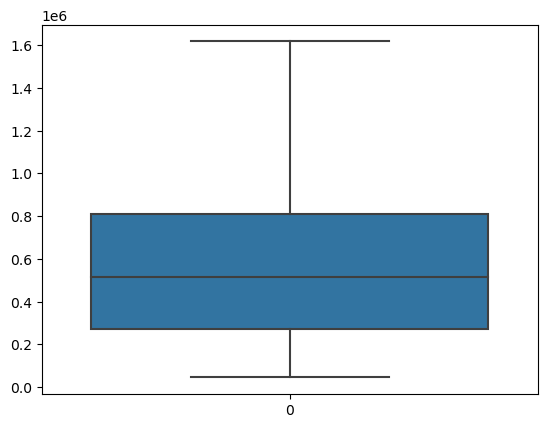

In [54]:
sns.boxplot(df.AMT_CREDIT)
plt.show()

In [55]:
Q3 = df.AMT_INCOME_TOTAL.quantile(0.75)
Q1 = df.AMT_INCOME_TOTAL.quantile(0.25)
IQR = Q3-Q1

upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR
print(IQR, upper_bound, lower_bound)

90000.0 337500.0 -22500.0


In [56]:
df.AMT_INCOME_TOTAL = np.where(df.AMT_INCOME_TOTAL> upper_bound, upper_bound, df.AMT_INCOME_TOTAL)

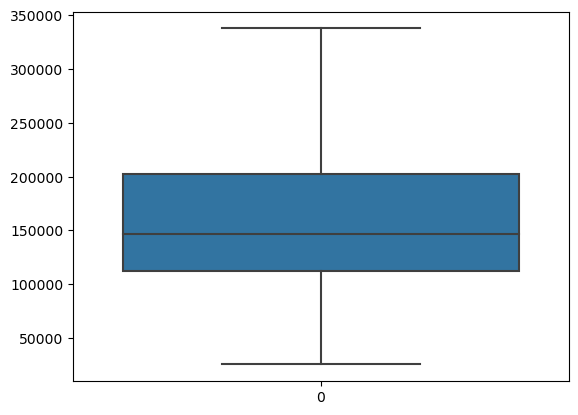

In [57]:
sns.boxplot(df.AMT_INCOME_TOTAL)
plt.show()

In [58]:
df.CNT_CHILDREN.describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

<Axes: >

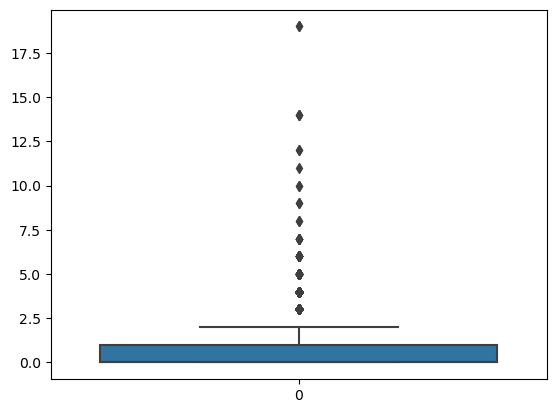

In [59]:
sns.boxplot(df.CNT_CHILDREN)

In [60]:
#for CNT_CHILDREN column
Q3 = df.CNT_CHILDREN.quantile(0.75)
Q1 = df.CNT_CHILDREN.quantile(0.25)
IQR = Q3-Q1

upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR
print(IQR, upper_bound, lower_bound)

1.0 2.5 -1.5


In [61]:
df.CNT_CHILDREN = np.where(df.CNT_CHILDREN> upper_bound, upper_bound, df.CNT_CHILDREN)

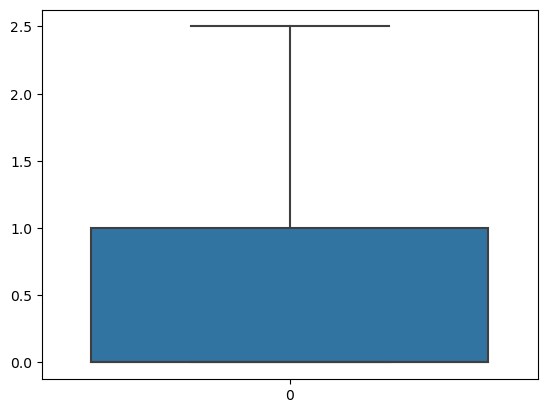

In [62]:
sns.boxplot(df.CNT_CHILDREN)
plt.show()

## <font color = purple>Binning of continuous variables like salary,age etc.</font>

In [63]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,3648.0,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,4260.0,2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,9833.0,2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,4311.0,3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
df['INC_TOTAL'] = pd.cut(df.AMT_INCOME_TOTAL ,bins = 5, labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High'] )

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


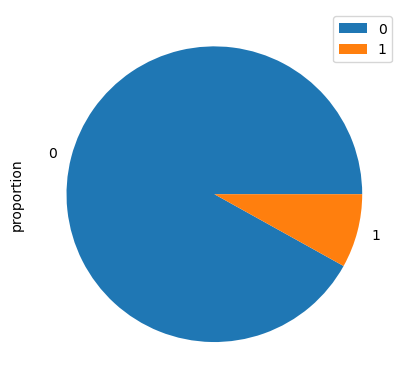

In [65]:
print(df.TARGET.value_counts(normalize = True))
df.TARGET.value_counts(normalize = True).plot.pie()
plt.legend()
plt.show()

## <font color = royalblue> Analysis </font>

In [66]:
#  divide the data into parts, Defaulters and Non-defaulters and will then perform Univariate, Bivariate and Multi-variate analysis parallely

In [67]:
defaulter = df[df.TARGET == 1]
non_defaulter = df[df.TARGET == 0]

In [68]:
defaulter.shape

(24825, 74)

In [69]:
non_defaulter.shape

(282686, 74)

In [70]:
defaulter.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INC_TOTAL
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,3648.0,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Normal
26,100031,1,Cash loans,F,N,Y,0.0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,51.298630,7.200000,6573.0,1827,1,1,0,1,0,0,Cooking staff,1,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,Low
40,100047,1,Cash loans,M,N,Y,0.0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,47.895890,3.457534,1182.0,1029,1,1,0,1,0,0,Laborers,2,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,Normal
42,100049,1,Cash loans,F,N,N,0.0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,36.668493,9.854795,45.0,4409,1,1,1,1,1,0,Sales staff,2,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,Low
81,100096,1,Cash loans,F,N,Y,0.0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,67.928767,1000.665753,5391.0,4199,1,0,0,1,0,0,Unknown,2,2,2,THURSDAY,10,0,0,0,0,0,0,Unknown,0.023952,0.720944,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Very Low


In [71]:
# UNIVARIATE ANALYSIS

In [72]:
?sns.barplot

In [73]:
?sns.countplot

In [74]:
df.INC_TOTAL.describe()

count     307511
unique         5
top          Low
freq      119923
Name: INC_TOTAL, dtype: object

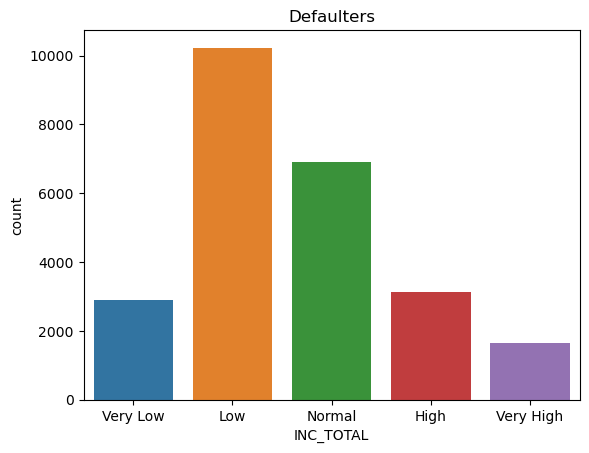

In [75]:
# INC_TOTAL VS TARGET

sns.countplot(data=df , x=defaulter.INC_TOTAL )
plt.title('Defaulters')
plt.show()

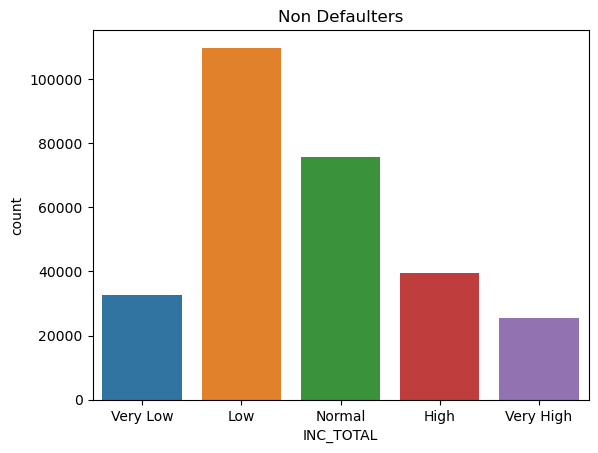

In [76]:
sns.countplot(data=df , x=non_defaulter.INC_TOTAL )
plt.title('Non Defaulters')
plt.show()

## <font color = red> Univariate </font>

**Now we are comparing both the figures**

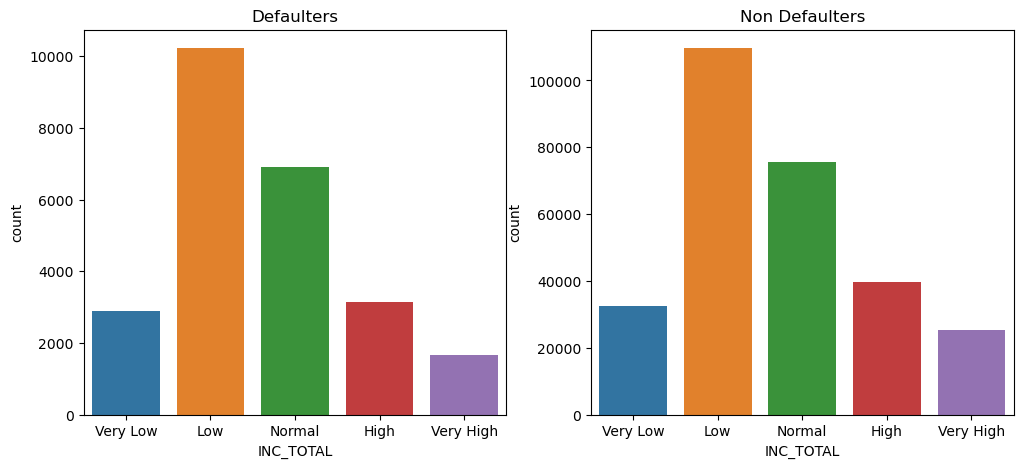

In [77]:
plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
sns.countplot(data=df , x=defaulter.INC_TOTAL )
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.countplot(data=df , x=non_defaulter.INC_TOTAL )
plt.title('Non Defaulters')




plt.show()

In [78]:
# furthermore we can clearly see that people who are defaulter are came under low income and 
# vice-versa

In [79]:
?plt.xticks

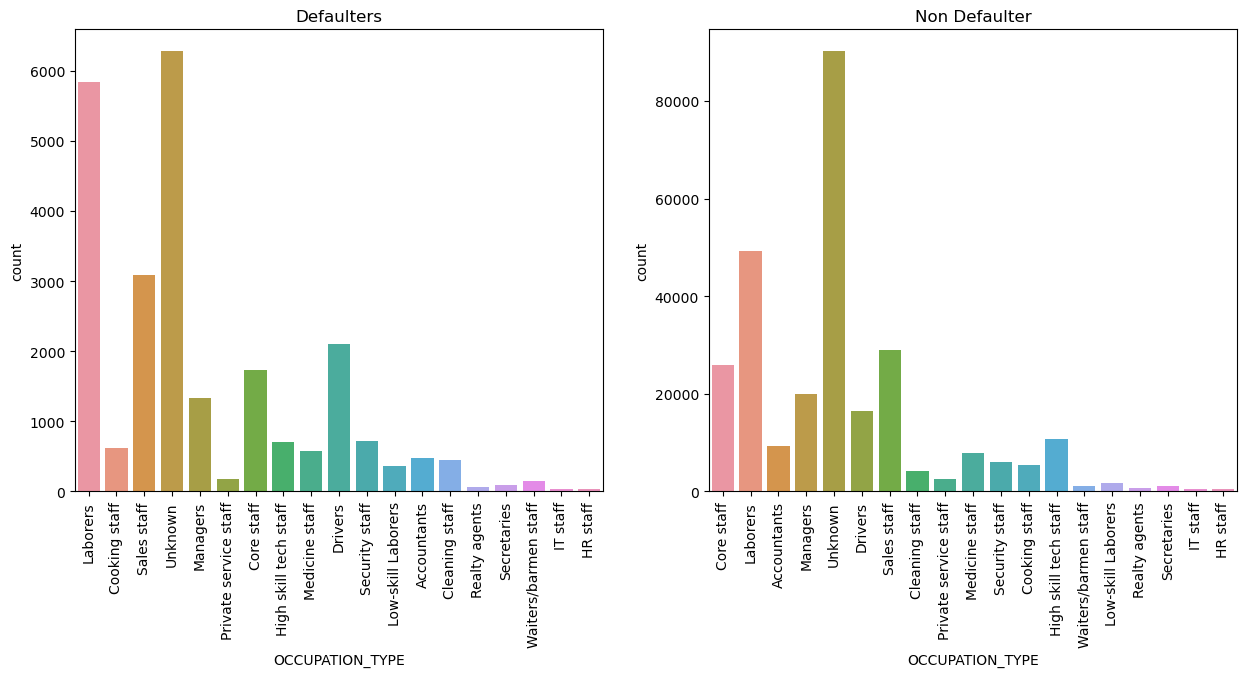

In [80]:
# df.OCCUPATION_TYPE VS TARGET

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(data=df , x=defaulter.OCCUPATION_TYPE)
plt.title("Defaulters")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(data=df , x=non_defaulter.OCCUPATION_TYPE)
plt.title("Non Defaulter")
plt.xticks(rotation=90
          
          )


plt.show()

In [81]:
# conclusion : people who has labourer occupation type is defaulter

In [82]:
# df.NAME_HOUSING_TYPE vs TARGET

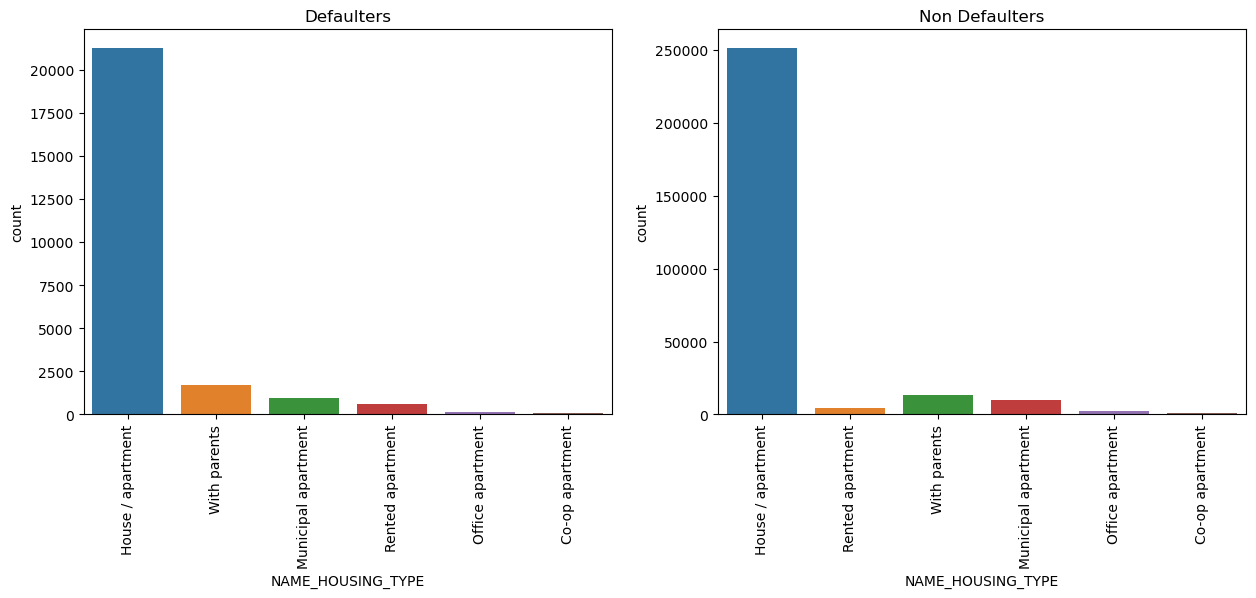

In [83]:
plt.figure(figsize=(15,5))


plt.subplot(1,2,1)
sns.countplot(data=df , x= defaulter.NAME_HOUSING_TYPE)
plt.title("Defaulters")
plt.xticks(rotation = 90)


plt.subplot(1,2,2)
sns.countplot(data=df ,
             x=non_defaulter.NAME_HOUSING_TYPE)
plt.title("Non Defaulters")
plt.xticks(rotation=90)

plt.show()

In [84]:
# defaulters as well as non defaulters both has more apartments

In [85]:
# df.AMT_CREDIT vs TARGET

In [86]:
?sns.distplot

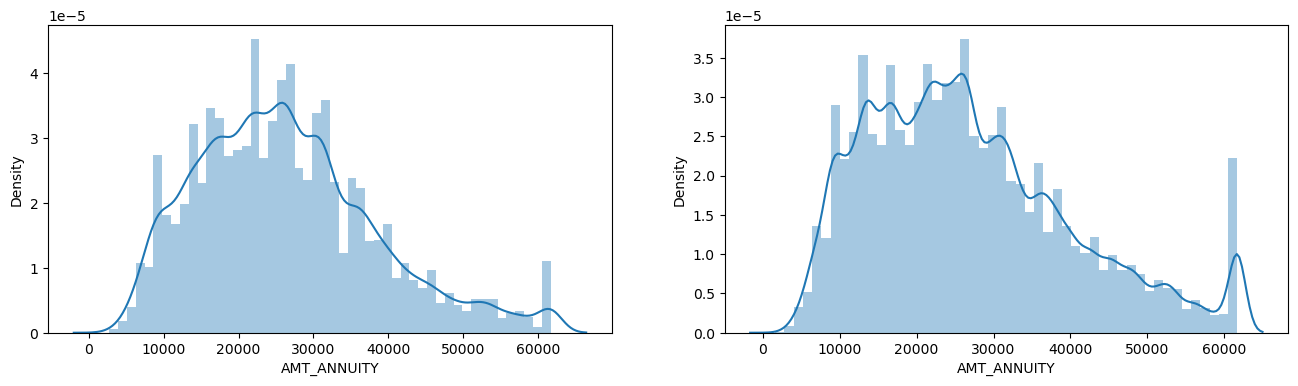

In [87]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.distplot(defaulter.AMT_ANNUITY , label="Defaulter")


plt.subplot(1,2,2)
sns.distplot(non_defaulter.AMT_ANNUITY , label="Non Defaulter")



plt.show()

In [89]:
# df.NAME_EDUCATION_TYPE vs TARGET

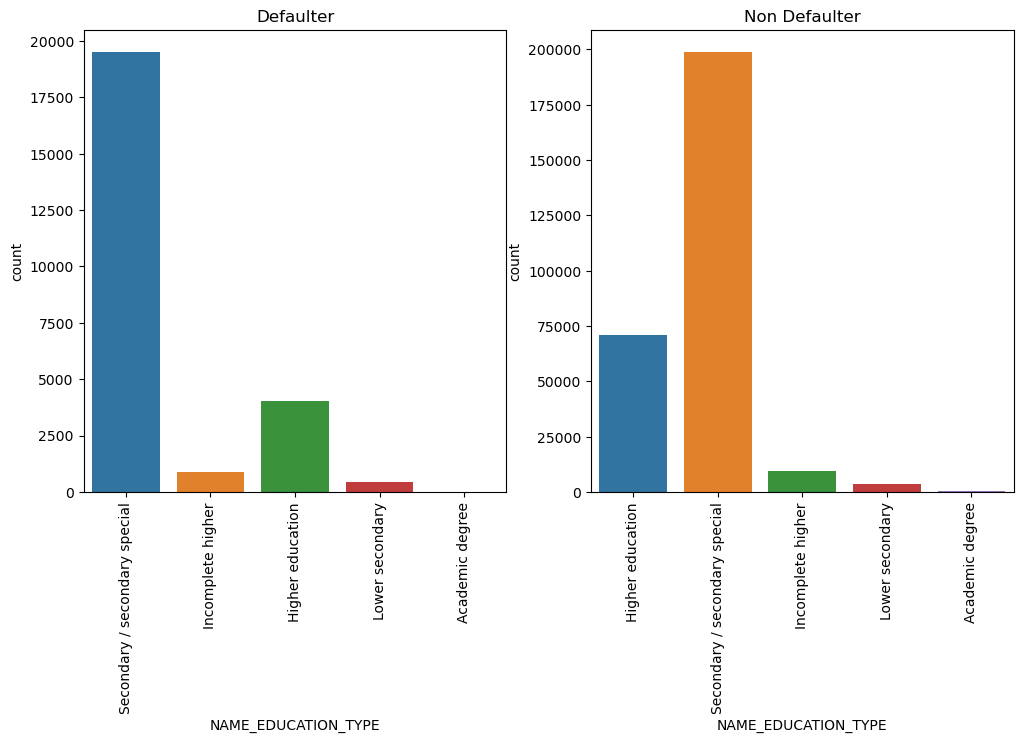

In [91]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(data=df , x=defaulter.NAME_EDUCATION_TYPE)
plt.title("Defaulter")
plt.xticks(rotation= 90)

plt.subplot(1,2,2)
sns.countplot(data=df , x=non_defaulter.NAME_EDUCATION_TYPE)
plt.title("Non Defaulter")
plt.xticks(rotation= 90)

plt.show()

In [92]:
# in both cases secondary education is highest

In [96]:
# df.NAME_CONTRACT_TYPE vs TARGET

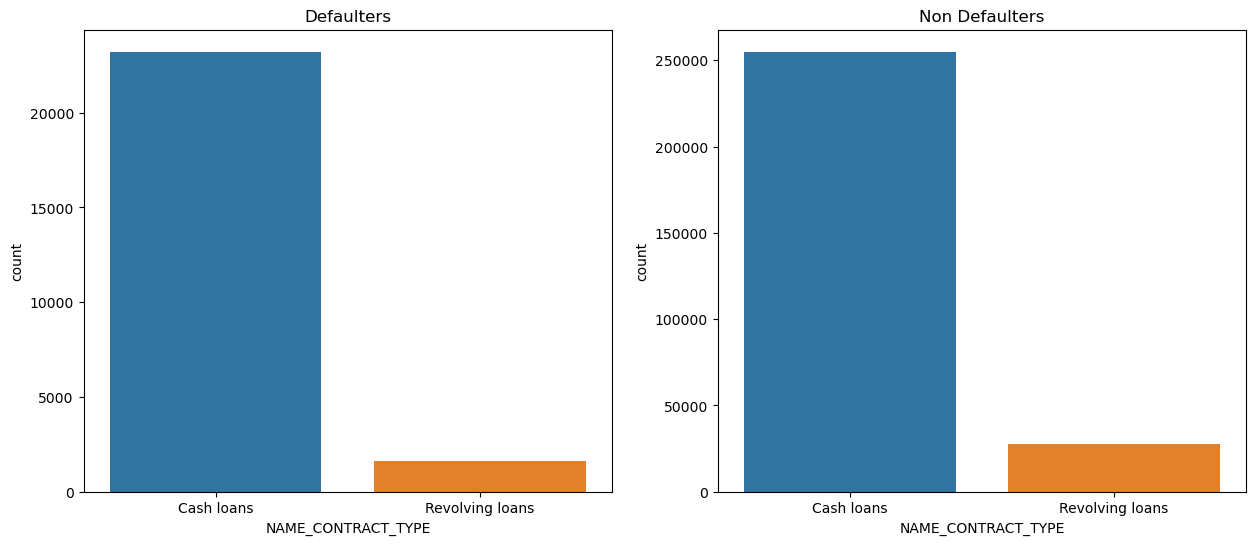

In [100]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(data=df , x= defaulter.NAME_CONTRACT_TYPE)
plt.title("Defaulters")

plt.subplot(1,2,2)
sns.countplot(data=df , x= non_defaulter.NAME_CONTRACT_TYPE)
plt.title("Non Defaulters")

plt.show()

In [99]:
# defaulters as well as non defaulters were taken cash loans

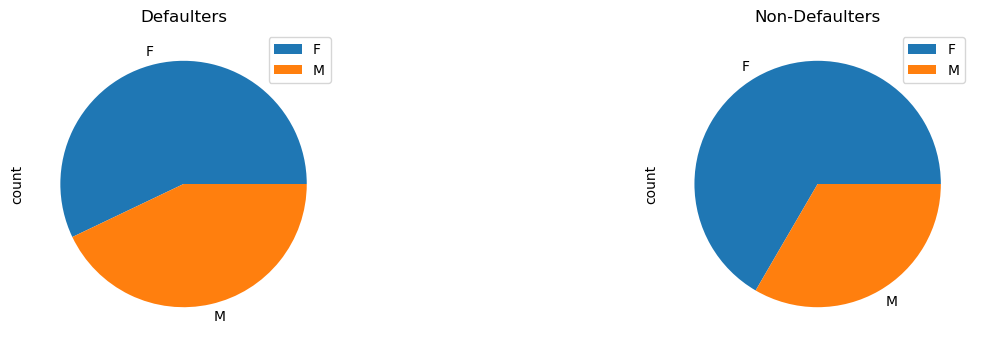

In [101]:
#df.CODE_GENDER vs TARGET
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
defaulter.CODE_GENDER.value_counts().plot(kind = 'pie')
plt.title('Defaulters')
plt.legend()

plt.subplot(1,2,2)
non_defaulter.CODE_GENDER.value_counts().plot(kind= 'pie')
plt.title('Non-Defaulters')
plt.legend()



plt.show()

# Bivariate Analysis

In [102]:
sns.boxplot?

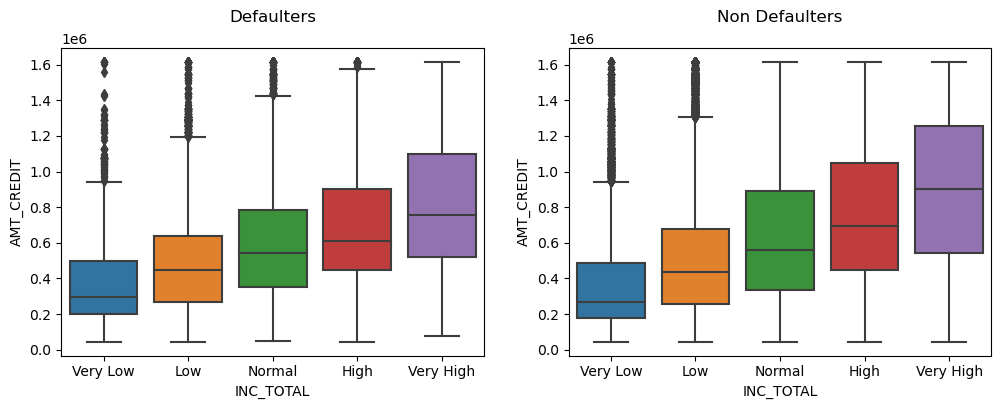

In [108]:
# df.INC_TOTAL vs df.AMT_CREDIT


plt.figure(figsize=(12,4))


plt.subplot(1,2,1)
sns.boxplot(data=df , x= defaulter.INC_TOTAL , y= defaulter.AMT_CREDIT) #categorical and numerical
plt.title("Defaulters\n")

plt.subplot(1,2,2)
sns.boxplot(data=df , x= non_defaulter.INC_TOTAL , y= non_defaulter.AMT_CREDIT)
plt.title("Non Defaulters\n")

plt.show()


- so we can see the comparison between categorical and numerical variable with the help of bivariate analysis

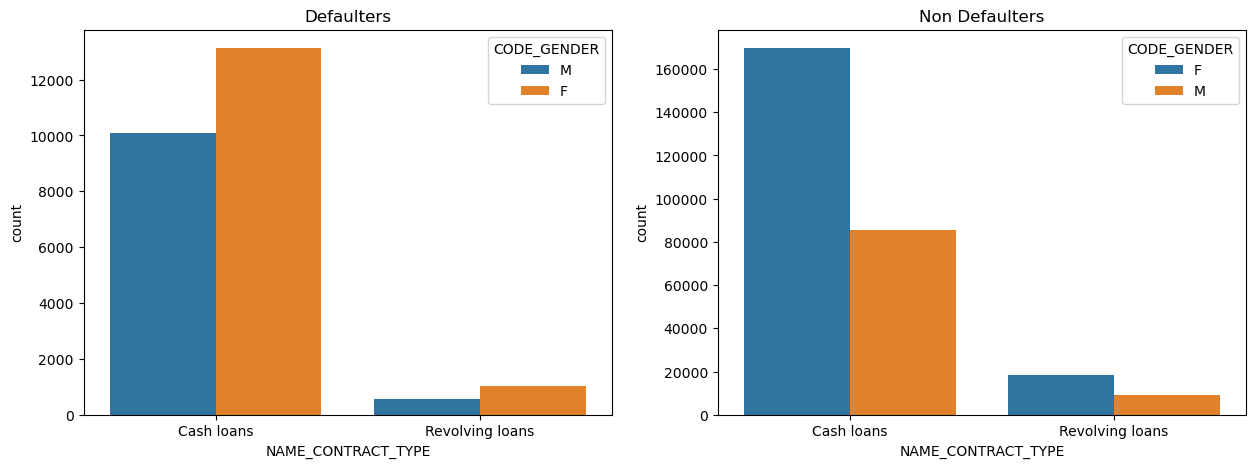

In [111]:
plt.figure(figsize=(15,5))


plt.subplot(1,2,1)
sns.countplot(data=df , x=defaulter.NAME_CONTRACT_TYPE ,hue= defaulter.CODE_GENDER)
plt.title("Defaulters")

plt.subplot(1,2,2)
sns.countplot(data=df , x=non_defaulter.NAME_CONTRACT_TYPE , hue= non_defaulter.CODE_GENDER)
plt.title("Non Defaulters")

plt.show()

<!-- In the above bivariate we are comparing both the categorical data   -->

In [113]:
# in case of defaulter category the female candidates are high and in case of non defaulter category male candidates are more .

In [112]:
# in the above situation we are comparing both categorical data

In [115]:
#Correlation matrix- finding top 10 highest correlated variables
num_col0=non_defaulter.select_dtypes('number')
corr_mat0=num_col0.corr(method='pearson')
corr_mat0=corr_mat0.unstack().sort_values(ascending=False).drop_duplicates()
corr_mat0.head(15)

SK_ID_CURR                   SK_ID_CURR                     1.000000
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998510
AMT_CREDIT                   AMT_GOODS_PRICE                0.985582
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950149
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.870962
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.859371
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.830381
AMT_ANNUITY                  AMT_GOODS_PRICE                0.797315
AMT_CREDIT                   AMT_ANNUITY                    0.794808
DAYS_EMPLOYED                DAYS_BIRTH                     0.626114
FLAG_DOCUMENT_6              DAYS_EMPLOYED                  0.596277
AMT_ANNUITY                  AMT_INCOME_TOTAL               0.492921
REG_REGION_NOT_LIVE_REGION   REG_REGION_NOT_WORK_REGION     0.446101
REG_CITY_NOT_WORK_CITY       REG_C

In [116]:
num_col1=defaulter.select_dtypes('number')
corr_mat1=num_col1.corr(method='pearson')
corr_mat1=corr_mat1.unstack().sort_values(ascending=False).drop_duplicates()
corr_mat1.head(15)

SK_ID_CURR                  SK_ID_CURR                     1.000000
OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE       0.998270
AMT_CREDIT                  AMT_GOODS_PRICE                0.981837
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.956637
CNT_CHILDREN                CNT_FAM_MEMBERS                0.875289
DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE       0.869016
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.847885
LIVE_CITY_NOT_WORK_CITY     REG_CITY_NOT_WORK_CITY         0.778540
AMT_GOODS_PRICE             AMT_ANNUITY                    0.760287
AMT_CREDIT                  AMT_ANNUITY                    0.760123
DAYS_EMPLOYED               FLAG_DOCUMENT_6                0.617646
                            DAYS_BIRTH                     0.582185
REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION     0.497937
REG_CITY_NOT_LIVE_CITY      REG_CITY_NOT_WORK_CITY         0.472052
AMT_ANNUITY                 AMT_INCOME_TOTAL    

Correlation for defaulters is  0.9818366038380503
Correlation for non-defaulters is  0.9855821500980368


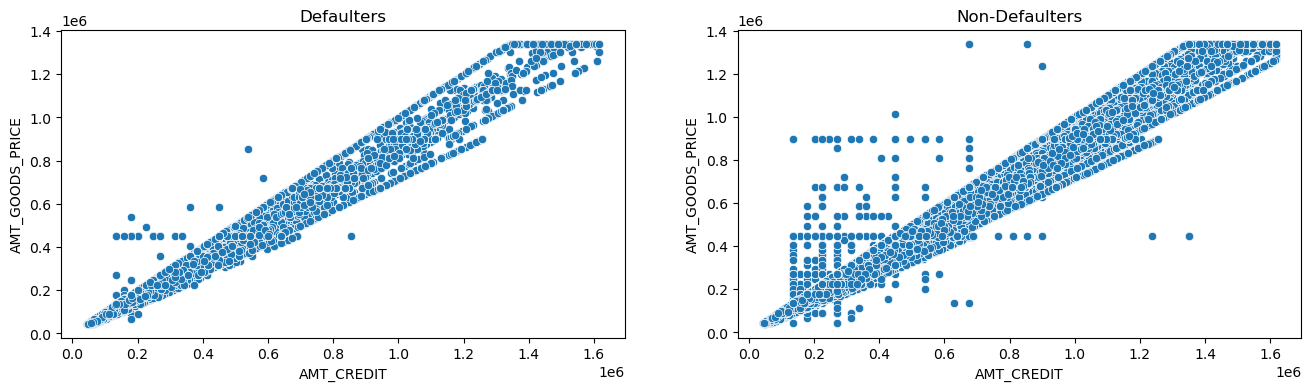

In [118]:
#AMT_CREDIT vs AMT_GOODS_PRICE
print('Correlation for defaulters is ', defaulter.AMT_CREDIT.corr(defaulter.AMT_GOODS_PRICE))
print('Correlation for non-defaulters is ', non_defaulter.AMT_CREDIT.corr(non_defaulter.AMT_GOODS_PRICE))

plt.figure(figsize = (16,4))

plt.subplot(1,2,1)
sns.scatterplot(data=df , x=defaulter.AMT_CREDIT, y=defaulter.AMT_GOODS_PRICE)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.scatterplot(data=df , x=non_defaulter.AMT_CREDIT, y=non_defaulter.AMT_GOODS_PRICE)
plt.title('Non-Defaulters')

plt.show()

Correlation for defaulters is  0.356198773589607
Correlation for non-defaulters is  0.41430852924965916


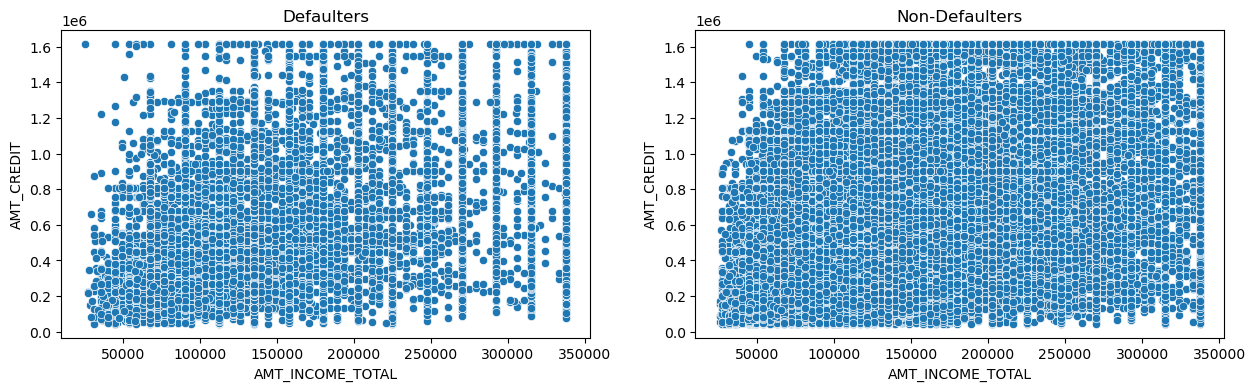

In [119]:
#AMT_CREDIT vs AMT_INCOME_TOTAL
print('Correlation for defaulters is ', defaulter.AMT_INCOME_TOTAL.corr(defaulter.AMT_CREDIT))
print('Correlation for non-defaulters is ', non_defaulter.AMT_INCOME_TOTAL.corr(non_defaulter.AMT_CREDIT))

plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
sns.scatterplot(data=df , x= defaulter.AMT_INCOME_TOTAL, y=defaulter.AMT_CREDIT)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.scatterplot(data=df , x= non_defaulter.AMT_INCOME_TOTAL, y=non_defaulter.AMT_CREDIT)
plt.title('Non-Defaulters')

plt.show()

In [120]:
# The correlation between income of client and the amount of loan does not seems to have a very good correlation for defaulters and non-defaulters both

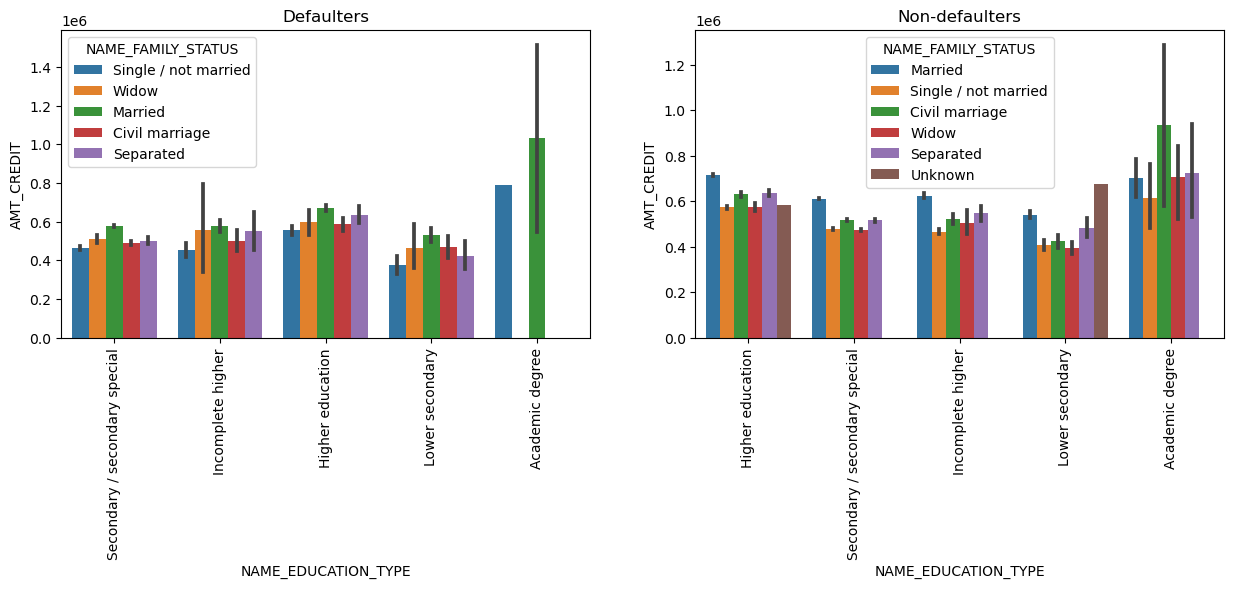

In [121]:
#NAME_EDUCATION_TYPE vs AMT_CREDIT vs NAME_FAMILY_STATUS
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
sns.barplot(data=df , x= defaulter.NAME_EDUCATION_TYPE, y=defaulter.AMT_CREDIT, hue = defaulter.NAME_FAMILY_STATUS)
plt.xticks(rotation = 90)
plt.title('Defaulters')


plt.subplot(1,2,2)
sns.barplot(data= df , x= non_defaulter.NAME_EDUCATION_TYPE, y=non_defaulter.AMT_CREDIT, hue = non_defaulter.NAME_FAMILY_STATUS)
plt.xticks(rotation = 90)
plt.title('Non-defaulters')

plt.show()

- There are no widows, civil marriage people and separated people having an academic degree and have failed in repaying the loan

# <font color = darkgreen> Multivariate Analysis </font>

In [124]:
defaulter.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INC_TOTAL
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,3648.0,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Normal
26,100031,1,Cash loans,F,N,Y,0.0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,51.298630,7.200000,6573.0,1827,1,1,0,1,0,0,Cooking staff,1,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,Low
40,100047,1,Cash loans,M,N,Y,0.0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,47.895890,3.457534,1182.0,1029,1,1,0,1,0,0,Laborers,2,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,Normal
42,100049,1,Cash loans,F,N,N,0.0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,36.668493,9.854795,45.0,4409,1,1,1,1,1,0,Sales staff,2,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,Low
81,100096,1,Cash loans,F,N,Y,0.0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,67.928767,1000.665753,5391.0,4199,1,0,0,1,0,0,Unknown,2,2,2,THURSDAY,10,0,0,0,0,0,0,Unknown,0.023952,0.720944,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Very Low
94,100112,1,Cash loans,M,Y,Y,0.0,315000.0,953460.0,61704.0,900000.0,Family,Commercial associate,Incomplete higher,Single / not married,With parents,0.030755,27.942466,5.520548,4802.0,1038,1,1,0,1,0,0,Unknown,1,2,2,SUNDAY,13,0,0,0,0,1,1,Industry: type 4,0.432340,0.077499,0.0,0.0,0.0,0.0,591.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,Very High
110,100130,1,Cash loans,F,N,Y,1.0,157500.0,723996.0,30802.5,585000.0,Unaccompanied,Commercial associate,Incomplete higher,Separated,House / apartment,0.007274,28.838356,0.731507,387.0,3190,1,1,0,1,1,0,Sales staff,2,2,2,SUNDAY,12,0,1,1,0,1,1,Trade: type 2,0.282069,0.120641,0.0,0.0,0.0,0.0,56.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
138,100160,1,Cash loans,M,N,Y,0.0,292500.0,67

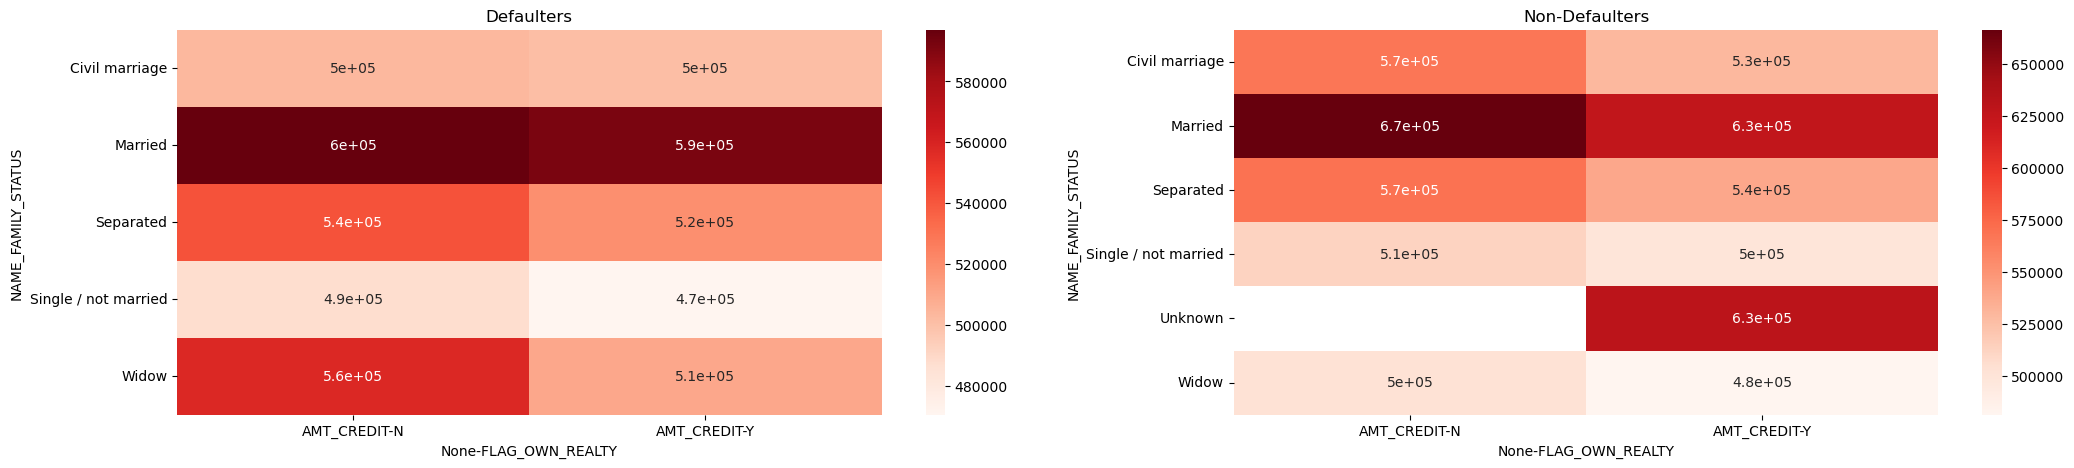

In [123]:
# df.NAME_FAMILY_STATUS vs df.FLAG_OWN_REALTY vs AMT_CREDIT
p1 = pd.pivot_table(defaulter, index =['NAME_FAMILY_STATUS'], columns = ['FLAG_OWN_REALTY'], values = ['AMT_CREDIT'])
p0 = pd.pivot_table(non_defaulter, index =['NAME_FAMILY_STATUS'], columns = ['FLAG_OWN_REALTY'], values = ['AMT_CREDIT'])

plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
sns.heatmap(p1, annot = True , cmap = 'Reds')
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.heatmap(p0, annot = True , cmap = 'Reds')
plt.title('Non-Defaulters')

plt.show()

In [125]:
# Married people who does not have a realty tend to take huge loans.
# Widows who does not have realty have taken huge loan and hence are unable to repay but there are some widows who do not have realty but have repaid the loan amount.
# Civil marriage people who are defaulters are having same amount of credit which is less than those who are non-defaulters but are still unable to repay the loan.

# <font color = dark> Analysing Previous Data </font>

In [126]:
df1 = pd.read_csv("previous_application.csv")

In [127]:
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
df1.shape

(1670214, 37)

In [132]:
df1.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [131]:
100*df1.isnull().mean().sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [135]:
cut_off = 40
drop_col = list(df1.columns[100*df1.isnull().mean()>cut_off])
print(drop_col)
print("\nno. of columns to be dropped",len(cols_to_drop))

['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']

no. of columns to be dropped 49


In [136]:
df1 = df1.drop(drop_col , axis=1)

In [138]:
df1.shape #from 37 to 26 therefore we dropped columns which contains more than 40% null

(1670214, 26)

In [139]:
df1.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [140]:
100*df1.isnull().mean().sort_values(ascending=False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

In [154]:
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [142]:
df1.AMT_GOODS_PRICE.fillna(df.AMT_GOODS_PRICE.median() ,inplace=True)               

In [143]:
100*df1.isnull().mean().sort_values(ascending=False) # now we are checking again

AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_PAYMENT_TYPE               0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
CODE_REJECT_REASON              0.000000
SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_GOODS_PRICE                 0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

In [145]:
df1.AMT_ANNUITY.fillna(df1.AMT_ANNUITY.median() ,inplace= True)
df1.CNT_PAYMENT.fillna(df1.CNT_PAYMENT.median() , inplace=True)

In [146]:
#  in case of df1.PRODUCT_COMBINATION we will replace nulls with the term "Unknown"

In [149]:
df1.PRODUCT_COMBINATION.fillna("Unknown" , inplace= True)

In [150]:
100*df1.isnull().mean().sort_values(ascending=False)

AMT_CREDIT                     0.00006
SK_ID_PREV                     0.00000
NAME_PAYMENT_TYPE              0.00000
NAME_YIELD_GROUP               0.00000
CNT_PAYMENT                    0.00000
NAME_SELLER_INDUSTRY           0.00000
SELLERPLACE_AREA               0.00000
CHANNEL_TYPE                   0.00000
NAME_PRODUCT_TYPE              0.00000
NAME_PORTFOLIO                 0.00000
NAME_GOODS_CATEGORY            0.00000
NAME_CLIENT_TYPE               0.00000
CODE_REJECT_REASON             0.00000
DAYS_DECISION                  0.00000
SK_ID_CURR                     0.00000
NAME_CONTRACT_STATUS           0.00000
NAME_CASH_LOAN_PURPOSE         0.00000
NFLAG_LAST_APPL_IN_DAY         0.00000
FLAG_LAST_APPL_PER_CONTRACT    0.00000
HOUR_APPR_PROCESS_START        0.00000
WEEKDAY_APPR_PROCESS_START     0.00000
AMT_GOODS_PRICE                0.00000
AMT_APPLICATION                0.00000
AMT_ANNUITY                    0.00000
NAME_CONTRACT_TYPE             0.00000
PRODUCT_COMBINATION      

In [159]:
df1.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

In [157]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [158]:
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [160]:
df1.DAYS_DECISION = df1.DAYS_DECISION.apply(lambda x: abs(x))

In [161]:
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [162]:
df1.DAYS_DECISION.describe()

count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64

**Now we'll check `Outliers`**

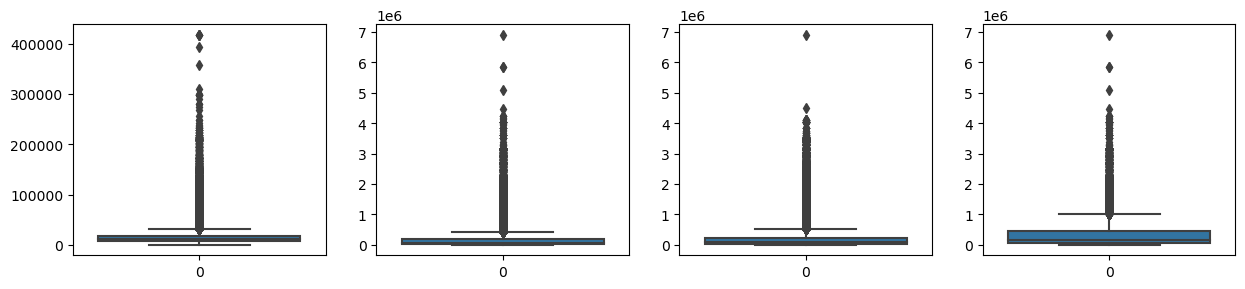

In [164]:
plt.figure(figsize=(15,3))

plt.subplot(1,4,1)
sns.boxplot(df1.AMT_ANNUITY)

plt.subplot(1,4,2)
sns.boxplot(df1.AMT_APPLICATION)

plt.subplot(1,4,3)
sns.boxplot(df1.AMT_CREDIT)

plt.subplot(1,4,4)
sns.boxplot(df1.AMT_GOODS_PRICE)

plt.show()

### Dealing with outliers

In [165]:
#AMT_ANNUITY
Q3 = df1.AMT_ANNUITY.quantile(0.75)
Q1 = df1.AMT_ANNUITY.quantile(0.25)
IQR = Q3 - Q1
upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR
print (IQR,upper_bound,lower_bound)

9276.930000000002 30739.421250000007 -6368.298750000004


In [166]:
df1.AMT_ANNUITY =  np.where(df1.AMT_ANNUITY>upper_bound,upper_bound,df1.AMT_ANNUITY)

In [167]:
#AMT_APPLICATION
Q3 = df1.AMT_APPLICATION.quantile(0.75)
Q1 = df1.AMT_APPLICATION.quantile(0.25)
IQR = Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
print (IQR,upper_bound,lower_bound)

161640.0 422820.0 -223740.0


In [168]:
df1.AMT_APPLICATION = np.where(df1.AMT_APPLICATION>upper_bound,upper_bound,df1.AMT_APPLICATION)

In [169]:
#AMT_CREDIT
Q3 = df1.AMT_CREDIT.quantile(0.75)
Q1 = df1.AMT_CREDIT.quantile(0.25)
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
print (IQR,upper_bound,lower_bound)

192258.0 504805.5 -264226.5


In [170]:
df1.AMT_CREDIT = np.where(df1.AMT_CREDIT>upper_bound,upper_bound,df1.AMT_CREDIT)

In [171]:
#AMT_GOODS_PRICE
Q3 = df1.AMT_GOODS_PRICE.quantile(0.75)
Q1 = df1.AMT_GOODS_PRICE.quantile(0.25)
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
print (IQR,upper_bound,lower_bound)

382500.0 1023750.0 -506250.0


In [172]:
df1.AMT_GOODS_PRICE = np.where(df1.AMT_GOODS_PRICE>upper_bound,upper_bound,df1.AMT_GOODS_PRICE)

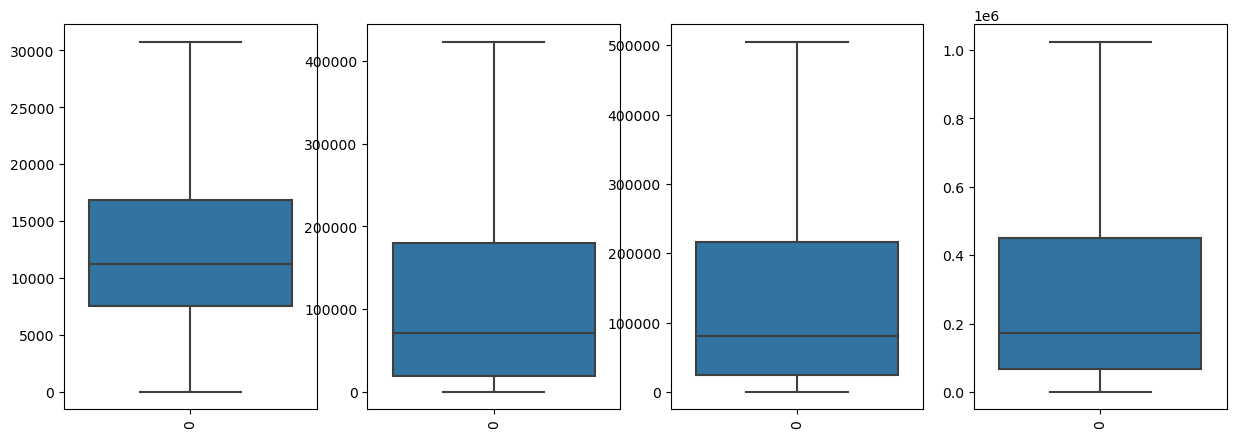

In [173]:
plt.figure(figsize = (15,5))

plt.subplot(1,4,1)
sns.boxplot(df1.AMT_ANNUITY)
plt.xticks(rotation = 90)



plt.subplot(1,4,2)
sns.boxplot(df1.AMT_APPLICATION)
plt.xticks(rotation = 90)



plt.subplot(1,4,3)
sns.boxplot(df1.AMT_CREDIT)
plt.xticks(rotation = 90)



plt.subplot(1,4,4)
sns.boxplot(df1.AMT_GOODS_PRICE)
plt.xticks(rotation = 90)

plt.show()

In [174]:
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.43000,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.61500,422820.0,504805.5,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.73500,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,30739.42125,422820.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,30739.42125,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [177]:
df1.NAME_CONTRACT_TYPE.unique()

array(['Consumer loans', 'Cash loans', 'Revolving loans', 'XNA'],
      dtype=object)

In [178]:
df1.NAME_CASH_LOAN_PURPOSE.unique()

array(['XAP', 'XNA', 'Repairs', 'Everyday expenses', 'Car repairs',
       'Building a house or an annex', 'Other', 'Journey',
       'Purchase of electronic equipment', 'Medicine',
       'Payments on other loans', 'Urgent needs', 'Buying a used car',
       'Buying a new car', 'Buying a holiday home / land', 'Education',
       'Buying a home', 'Furniture', 'Buying a garage',
       'Business development', 'Wedding / gift / holiday', 'Hobby',
       'Gasification / water supply', 'Refusal to name the goal',
       'Money for a third person'], dtype=object)

In [179]:
df1.NAME_CASH_LOAN_PURPOSE.nunique()

25

In [180]:
df1.NAME_PAYMENT_TYPE.unique()

array(['Cash through the bank', 'XNA', 'Non-cash from your account',
       'Cashless from the account of the employer'], dtype=object)

In [181]:
df1.CODE_REJECT_REASON.unique()

array(['XAP', 'HC', 'LIMIT', 'CLIENT', 'SCOFR', 'SCO', 'XNA', 'VERIF',
       'SYSTEM'], dtype=object)

In [182]:
df1.NAME_CLIENT_TYPE.unique()

array(['Repeater', 'New', 'Refreshed', 'XNA'], dtype=object)

In [183]:
df1.NAME_GOODS_CATEGORY.unique()

array(['Mobile', 'XNA', 'Consumer Electronics', 'Construction Materials',
       'Auto Accessories', 'Photo / Cinema Equipment', 'Computers',
       'Audio/Video', 'Medicine', 'Clothing and Accessories', 'Furniture',
       'Sport and Leisure', 'Homewares', 'Gardening', 'Jewelry',
       'Vehicles', 'Education', 'Medical Supplies', 'Other',
       'Direct Sales', 'Office Appliances', 'Fitness', 'Tourism',
       'Insurance', 'Additional Service', 'Weapon', 'Animals',
       'House Construction'], dtype=object)

In [184]:
df1.NAME_PORTFOLIO.unique()

array(['POS', 'Cash', 'XNA', 'Cards', 'Cars'], dtype=object)

In [185]:
df1.NAME_PRODUCT_TYPE.unique()

array(['XNA', 'x-sell', 'walk-in'], dtype=object)

In [186]:
df1.CHANNEL_TYPE.unique()

array(['Country-wide', 'Contact center', 'Credit and cash offices',
       'Stone', 'Regional / Local', 'AP+ (Cash loan)',
       'Channel of corporate sales', 'Car dealer'], dtype=object)

In [187]:
df1.NAME_SELLER_INDUSTRY.unique()

array(['Connectivity', 'XNA', 'Consumer electronics', 'Industry',
       'Clothing', 'Furniture', 'Construction', 'Jewelry',
       'Auto technology', 'MLM partners', 'Tourism'], dtype=object)

In [188]:
df1.NAME_YIELD_GROUP.unique()

array(['middle', 'low_action', 'high', 'low_normal', 'XNA'], dtype=object)

In [189]:
df1.NAME_CONTRACT_STATUS.unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

## previous data and application data has a common column i.e., SK_ID_CURR. Let's merge these two data on this column and check if we can get some good insights.

In [190]:
merged_data= df.merge(df1,  on='SK_ID_CURR',   how='left',     suffixes=('_c','_p'))

In [191]:
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_c,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_c,AMT_ANNUITY_c,AMT_GOODS_PRICE_c,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_c,HOUR_APPR_PROCESS_START_c,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INC_TOTAL,SK_ID_PREV,NAME_CONTRACT_TYPE_p,AMT_ANNUITY_p,AMT_APPLICATION,AMT_CREDIT_p,AMT_GOODS_PRICE_p,WEEKDAY_APPR_PROCESS_START_p,HOUR_APPR_PROCESS_START_p,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,3648.0,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Normal,1038818.0,Consumer loans,9251.77500,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,1810518.0,Cash loans,30739.42125,422820.0,504805.5,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,2636178.0,Consumer loans,30739.42125,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,2396755.0,Consumer loans,6737.31000,68809.5,68053.5,68809.5,SATURDAY,15.0,Y,1.0,XAP,Approved,2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronic

<Axes: xlabel='NAME_CONTRACT_STATUS'>

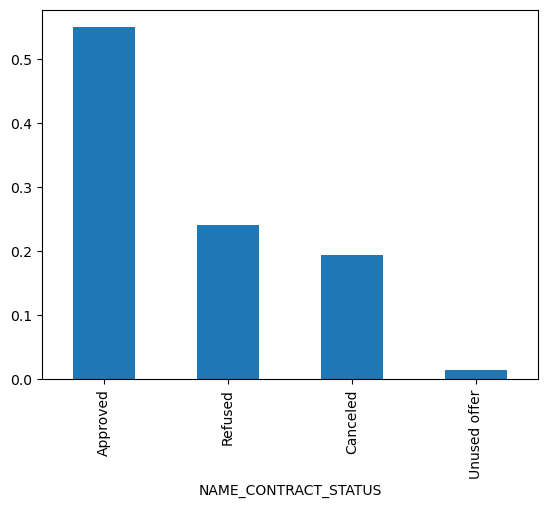

In [192]:
#current defaulters vs previous contract status
merged_data[merged_data.TARGET == 1].NAME_CONTRACT_STATUS.value_counts(normalize= True).plot.bar()

In [193]:
# It can be seen that amongst the defaulters 25% of people's applications were rejected in their previous applications and almost 50% applications were approved.

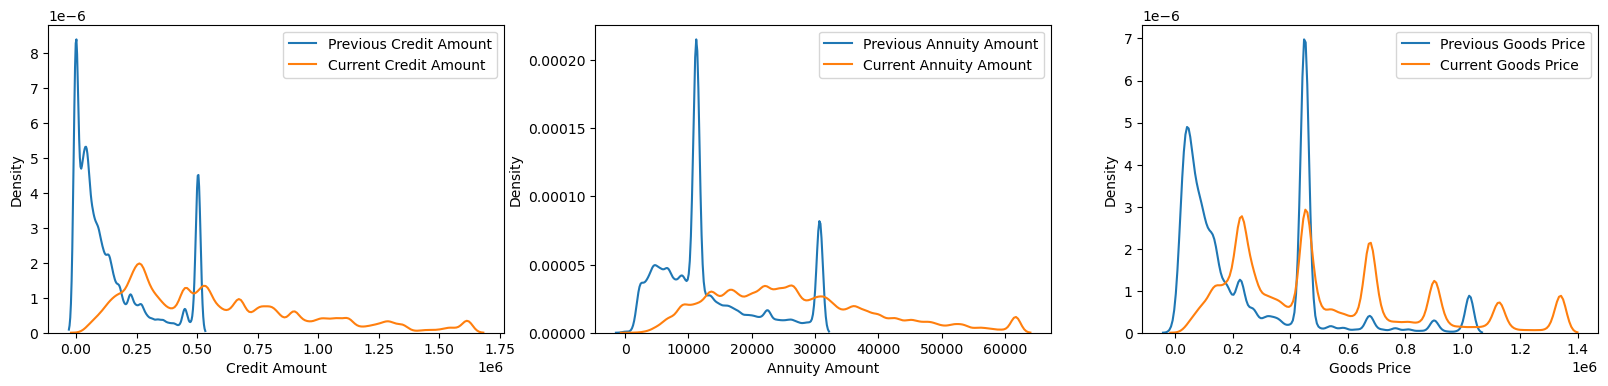

In [194]:
plt.figure(figsize = (20,4))

plt.subplot(1,3,1)

sns.distplot(merged_data.AMT_CREDIT_p, hist = False, label = 'Previous Credit Amount')
sns.distplot(merged_data.AMT_CREDIT_c, hist = False, label = 'Current Credit Amount')
plt.xlabel('Credit Amount')
plt.legend()

plt.subplot(1,3,2)
sns.distplot(merged_data.AMT_ANNUITY_p, hist = False, label = 'Previous Annuity Amount')
sns.distplot(merged_data.AMT_ANNUITY_c, hist = False, label = 'Current Annuity Amount')
plt.xlabel('Annuity Amount')
plt.legend()

plt.subplot(1,3,3)
sns.distplot(merged_data.AMT_GOODS_PRICE_p, hist = False, label = 'Previous Goods Price')
sns.distplot(merged_data.AMT_GOODS_PRICE_c, hist = False, label = 'Current Goods Price')
plt.xlabel('Goods Price')
plt.legend()

plt.show()

In [ ]:
# The previous applicants are maximum in the credit range of 1L-2L, but a sudden downfall is seen for the credit range of 2L-4L with again a rise at 5L. The current applicants seems to follow a normal trend.
# An almost similar trend is seen in the price of goods graph for previous applications, but in new applications maximum people have purchased goods of around 3L, 5L, 7L, i.e. in odd amounts.
# All the graphs clearly depicts that the maximums of each variable in previous applications are less than the maximums of each variable in the current applications.